In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import nibabel as nib
import urllib

### Read in the phenotypic behavioural data

This is the **Phenotypic_V1_0b_preprocessed1.csv** file.

You can find the explanations of all the columns in the **ABIDE_LEGEND_V1.02.pdf** file.

We're going to load the data into a pandas data frame.

In [2]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'
df = pd.read_csv(behav_data_f)

Our measure of interest is **func_perc_fd** so lets get rid of all participants who don't have a value!

We also want to know the **age in years** for each participant.

In [3]:
df = df.loc[df['func_perc_fd'].notnull(), :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])

### Create a stratified sample

We want to see how similar the average connectivity values are ***when there are no differences between the groups***.

Therefore we need to split participants into ***matched*** samples.

What do they need to be matched on?!

* DSM_IV_TR -- their diagnosis according to the DSM IV (0: control, 1: ASD, 2: Asp, 3: PDD)
* SITE_ID -- the scanning site
* AGE_YRS -- age in years
* SEX -- sex (1: male, 2: female)


### Threshold your sample according to the motion/age cut offs

We're going to systematically change the upper threshold of the percent of volumes that exceed 0.2mm frame to frame dispacement.

And we're also going to select our lower and upper age limits. NOTE that these are inclusive boundaries. So for example a lower limit of 6 and an upper limit of 10 will include participants who are 6, 7, 8, 9 and 10 years old.

* func_perc_fd
* AGE_YRS

In [4]:
motion_thresh = 20
df_samp_motion = df.loc[df['func_perc_fd']<motion_thresh, :]

In [5]:
age_l, age_u = 6, 10
df_samp = df_samp_motion.loc[(df_samp_motion['AGE_YRS']>=age_l) & (df_samp_motion['AGE_YRS']<=age_u), :]

### Only keep 2n participants

Where n is the number of participants you're going to put in each group.

Remember to shuffle before you do this so you don't keep the top n participant every time.

In [6]:
n = 10000
n_2 = 2*n

df_samp_rand = df_samp.reindex(np.random.permutation(df_samp.index))
df_samp_2n = df_samp_rand.iloc[:n_2, :]

### Sort according to the matching measures

In [10]:
sort_column_list = ['DSM_IV_TR', 'DX_GROUP', 'SITE_ID', 'SEX', 'AGE_YRS']
df_samp_2n_sorted = df_samp_2n.sort_values(by=sort_column_list)

### Split this data frame into two and VOILA

In [11]:
df_grp_A = df_samp_2n_sorted.iloc[::2, :]
df_grp_B = df_samp_2n_sorted.iloc[1::2, :]

In [139]:
print df_grp_A.loc[:, 'SUB_ID'].values
print df_grp_B.loc[:, 'SUB_ID'].values


[50146 50143 51165 50302 51197 51184 50127 51486 50669 50787 50778 50688
 50698 50740 50731 51357 51346 51340 51064 51070 51069 51084 51065 51106
 51109 51113 51118 51039 51053 51059 50117 50114 50037 50052 51557 50200
 50214 50211 50268 51134 50270 51262 51272 51265 51267 50363 50352 50329
 50374 50385 50448 50566 50571 50576 51466 50649 50798 50711 50689 50745
 50989 51006 50988 50996 51021 50955 50015 50011 50055 50024 50183 50241
 51240 51208 50291 50290 50287 50285 50276 50413 50407 50520 50495 50488
 50482 50525 50529 50824 51323 51324 51321 50970 50974 51019 50182 50965
 50235 50527 50625 51470]
[50150 51175 51167 50158 51188 50131 51487 51485 50779 50820 50812 50685
 50703 50725 51360 51335 51339 51371 51079 51081 51085 51086 51073 51104
 51146 51153 51068 51042 51057 50102 50107 50031 50040 50059 51561 50194
 50203 51142 51141 51139 51280 51276 51269 51268 51282 50362 50345 50331
 50341 50382 50435 50574 50575 51465 51458 50802 50686 50697 50755 51351
 50993 51000 50999 50995 

# Gettin the data

In [69]:
for f_id in df_grp_A.loc[:, 'FILE_ID'].values:
    
    if not f_id == "no_filename":
        testfile = urllib.URLopener()
    
        testfile.retrieve(("https://s3.amazonaws.com/fcp-indi/data/Projects"
                           "/ABIDE_Initiative/Outputs/cpac/filt_noglobal/rois_aal"
                           "/{}_rois_aal.1D".format(f_id)), 
                              "DATA/{}_rois_aal.1D".format(f_id))


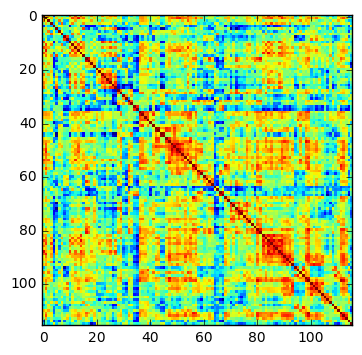

In [42]:
corr_df = pd.read_table('DATA/test_file.1D')

plt.imshow(corr_df.corr(), interpolation='nearest')

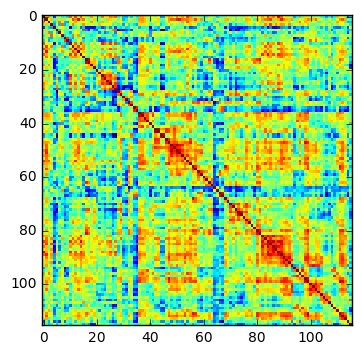

In [43]:
plt.imshow(corr_df.corr(), interpolation='none')

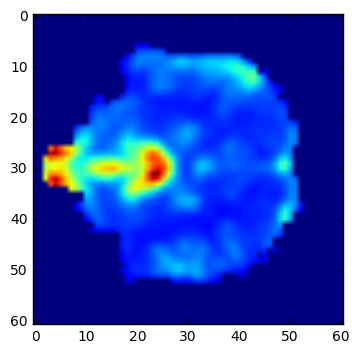

In [33]:
img = nib.load('DATA/test_file.nii.gz')
d = img.get_data()
plt.imshow(d[:, 30, :])